In [4]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import skimage

from skimage.feature import hog
from skimage import data, exposure
from skimage.exposure import histogram
from skimage.feature import match_template
from skimage.transform import rescale
from skimage.util import random_noise
from scipy.signal import correlate2d
from skimage import io
from skimage.transform import resize

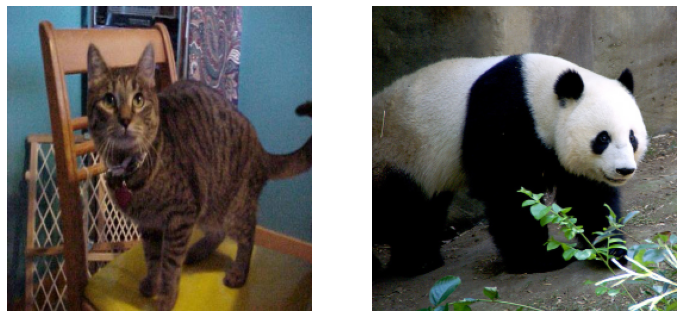

In [5]:
size = 256

cats = [resize(io.imread(f"animals/cats/cats_0000{idx}.jpg"), (size, size)) for idx in range(1,6)]
dogs = [resize(io.imread(f"animals/dogs/dogs_0000{idx}.jpg"), (size, size)) for idx in range(1,6)]
pandas = [resize(io.imread(f"animals/pandas/panda_0000{idx}.jpg"), (size, size)) for idx in range(1,6)]
images = cats + dogs + pandas

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axes[0].imshow(cats[0]) and axes[0].axis('off')
axes[1].imshow(dogs[0]) and axes[1].axis('off')
axes[2].imshow(pandas[0]) and axes[2].axis('off')

plt.show()

In [6]:

cats_hog = [hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), channel_axis=2) for img in cats]
dogs_hog = [hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), channel_axis=2) for img in dogs]
pandas_hog = [hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), channel_axis=2) for img in pandas]

# étiquettes (1 pour les vélos, 2 pour les voitures)
cats_labels = 1 * np.ones((len(cats_hog), ))
dogs_labels = 2 * np.ones((len(dogs_hog), ))
pandas_labels = 3 * np.ones((len(pandas_hog), ))

dataset = np.concatenate((cats_hog, dogs_hog, pandas_hog))
labels = np.concatenate((cats_labels, dogs_labels, pandas_labels)).astype("int")
print(labels.shape)

(15,)


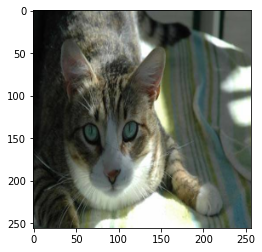

In [7]:
query = resize(io.imread("animals/cats/cats_00006.jpg"), (size, size))
plt.imshow(query) and plt.show()

[ 5  7  9  1  4 12 14  0 13  3 11 10  8  6  2]
Étiquettes des 5 images les plus proches : [2 2 2 1 1]
Étiquette majoritaire : 2


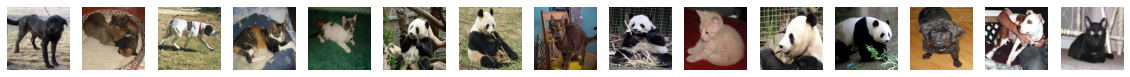

In [8]:
hog_query = hog(query, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), channel_axis=2)
scores = np.array([np.linalg.norm(hog_query - hog) for hog in dataset])

closest = np.argsort(scores)
print(closest)
fig, axes = plt.subplots(nrows=1, ncols=len(closest), figsize=(20, 8))
for idx, img_idx in enumerate(closest):
    axes[idx].imshow(images[img_idx]) and axes[idx].axis('off')

k = 5
closest_labels = labels[closest[:k]]
print(f"Étiquettes des {k} images les plus proches : {closest_labels}")
print(f"Étiquette majoritaire : {np.argmax(np.bincount(closest_labels))}")